In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../datasets/train.csv', encoding="latin-1").drop(columns=['Other_Race', 'Hispanic', 'Other_Diagnosis', 
    'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'Alcohol', 'Drug', 'Product_1', 'Product_2', 'Product_3']).dropna()

In [9]:
disposition = LabelEncoder()
location = LabelEncoder()
df["disposition_n"] = disposition.fit_transform(df["Disposition"])
df["location_n"] = disposition.fit_transform(df["Location"])
df.head()

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Narrative,Stratum,PSU,Weight,disposition_n,location_n
0,900763,180608221.0,5/29/2018,25,1,2.0,35.0,71.0,1.0,9.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188,0,8
1,762342,180109488.0,1/1/2018,70,2,1.0,30.0,55.0,1.0,1.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782,0,1
2,560150,170718633.0,7/5/2017,18,1,0.0,92.0,59.0,1.0,9.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828,0,8
3,464771,170429466.0,4/1/2017,17,2,1.0,34.0,53.0,1.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570,0,0
4,866180,180504499.0,4/27/2018,27,1,2.0,35.0,64.0,1.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919,0,0


In [10]:
X = df["location_n"]
X.shape

(702542,)

In [5]:
Y = df["disposition_n"]
Y.shape

(702542,)

In [17]:
data = {}
data['disposition'] = Y
data['location'] = X

my_data = pd.DataFrame(data, columns=['disposition', 'location'])
kmeans = KMeans(n_clusters=4).fit(my_data)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.00951041 0.59843947]
 [0.11544658 7.70871155]
 [0.35811238 3.76964817]
 [2.36327595 0.69814805]]


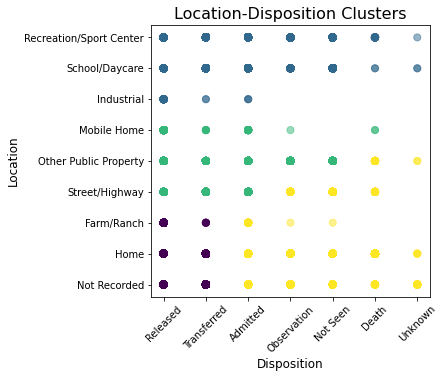

In [18]:
plt.figure(figsize=(5,5))
plt.title('Location-Disposition Clusters', fontsize=16)
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.scatter(my_data['disposition'], my_data['location'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

x1 = [0, 1, 2, 3, 4, 5, 6]
y1 = [0, 1, 2, 3, 4, 5, 6, 7, 8]
dispositions = ['Released', 'Transferred', 'Admitted', 'Observation', 'Not Seen', 'Death', 'Unknown']
locations = ['Not Recorded', 'Home', 'Farm/Ranch', 'Street/Highway', 'Other Public Property', 'Mobile Home', 'Industrial',
    'School/Daycare', 'Recreation/Sport Center']
plt.xticks(x1, dispositions, rotation=45)
plt.yticks(y1, locations, rotation=0)

plt.savefig('../../outputs/location-disposition-clusters.png')